In [12]:
import pandas as pd
import time
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [13]:


def read_indianPines():
    Indian_X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
    Indian_Y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
    #print(f"X shape: {X.shape}\ny shape: {y.shape}")
    return Indian_X, Indian_Y
    

In [9]:
start = time.process_time()
### CLASSIFICATION OF DATASET###

#Read data
indian_X,indian_Y = read_indianPines()

#data dimensions
x, y, z = indian_X.shape

#reshapes arrays to have all data of each matrix into vectors
indian_X2d = indian_X.reshape((x * y, z))
indian_Y2d = indian_Y.reshape((x * y, 1))

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(indian_X2d, indian_Y2d, test_size=0.3, random_state=11, stratify=indian_Y2d) # 25% train 75% test
print(y_train.shape, "   ", y_test.shape)

#Creates Svm Clasiffier
Classifier = svm.SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

#Train the model using the training sets
Classifier.fit(X_train, y_train.ravel())

print("Time taken by svm with full dataset: ", time.process_time() - start)

(14717, 1)     (6308, 1)
Time taken by svm with full dataset:  54.65625


In [10]:
#PREDICTION OF ACCURACY AND VISUALIZATION

ypred = Classifier.predict(X_test)


(17, 17)


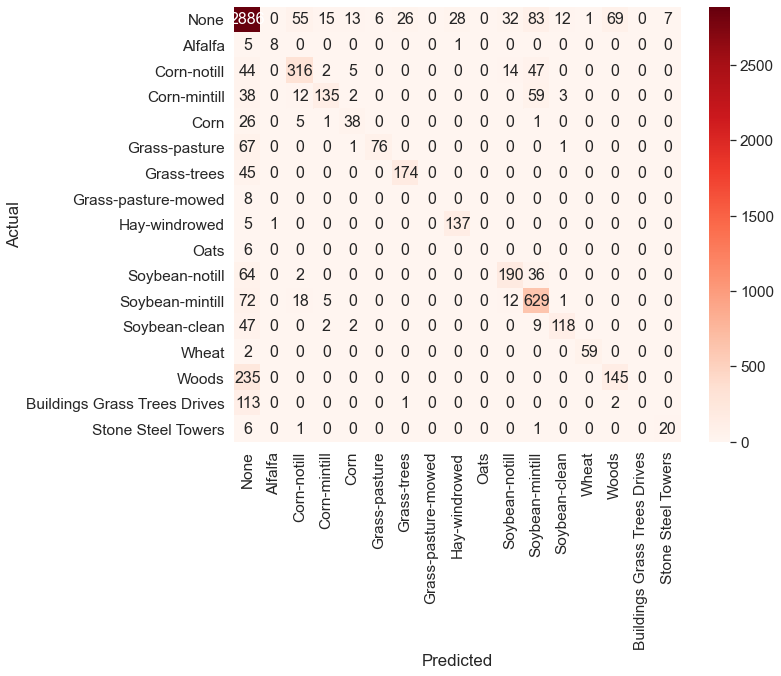

In [11]:
names = ['None','Alfalfa','Corn-notill', 'Corn-mintill','Corn','Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat','Woods','Buildings Grass Trees Drives','Stone Steel Towers']

data = metrics.confusion_matrix(y_test, ypred)
print(data.shape)
df_cm = pd.DataFrame(data, columns=np.array(names), index = np.array(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [22]:
print(metrics.classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                        None       0.70      0.91      0.79      2155
                     Alfalfa       0.00      0.00      0.00         9
                 Corn-notill       0.67      0.59      0.63       285
                Corn-mintill       0.73      0.34      0.47       166
                        Corn       0.70      0.34      0.46        47
               Grass-pasture       0.00      0.00      0.00        97
                 Grass-trees       0.00      0.00      0.00       146
         Grass-pasture-mowed       0.00      0.00      0.00         6
               Hay-windrowed       0.80      0.96      0.87        96
                        Oats       0.00      0.00      0.00         4
              Soybean-notill       0.68      0.53      0.60       194
             Soybean-mintill       0.62      0.83      0.71       491
               Soybean-clean       0.88      0.29      0.44       119
                   

C:\Users\marat\Anaconda3\envs\ai\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marat\Anaconda3\envs\ai\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marat\Anaconda3\envs\ai\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:

bands_FDPC = loadmat('SelectedBandsOCF.mat')['band_FDPC']

bands_NC_IE = loadmat('SelectedBandsOCF.mat')['band_NC_IE']

bands_simil = loadmat('SelectedSBS.mat')['bands_simil']

bands_svd = loadmat('SelectedSBS.mat')['bands_svd']


In [14]:
def extract_pixels(X, y):
    q = X.reshape(-1, X.shape[2])
    df = pd.DataFrame(data = q)
    df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
    df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
    #df.to_csv('Dataset.csv')
    return df

In [15]:
start = time.process_time()
### CLASSIFICATION OF DATASET###

#Read data
indian_X,indian_Y = read_indianPines()
#print(bands_FDPC[3,:]-1)
indian_X_selected = indian_X#[:,:,bands_FDPC[3,:32]-1]

print(indian_X_selected.shape)

#data dimensions
x, y, z = indian_X_selected.shape

#reshapes arrays to have all data of each matrix into vectors
#indian_X2d = indian_X_selected.reshape((x * y, z))
#indian_Y2d = indian_Y.reshape((x * y, 1))

data_indian = extract_pixels(indian_X_selected, indian_Y)

data_x = data_indian[data_indian['class'] != 0]

indian_X2d = data_x.iloc[:, :-1].values

indian_Y2d = data_x.loc[:, 'class'].values 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(indian_X2d, indian_Y2d, test_size=0.7, random_state=11, stratify=indian_Y2d) # 25% train 75% test
print(y_train.shape, "   ", y_test.shape)

#Creates Svm Clasiffier
Classifier = svm.SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

#Train the model using the training sets
Classifier.fit(X_train, y_train.ravel())

print("Time taken by svm with full dataset: ", time.process_time() - start)

(145, 145, 200)
(3074,)     (7175,)
Time taken by svm with full dataset:  1.828125


<class 'numpy.ndarray'> (7175,)
(16, 16)
                              precision    recall  f1-score   support

                     Alfalfa       0.95      0.56      0.71        32
                 Corn-notill       0.81      0.68      0.73      1000
                Corn-mintill       0.81      0.60      0.69       581
                        Corn       0.72      0.52      0.60       166
               Grass-pasture       0.94      0.94      0.94       338
                 Grass-trees       0.90      0.97      0.93       511
         Grass-pasture-mowed       0.93      0.65      0.76        20
               Hay-windrowed       0.95      0.99      0.97       335
                        Oats       0.67      0.43      0.52        14
              Soybean-notill       0.72      0.72      0.72       680
             Soybean-mintill       0.72      0.90      0.80      1719
               Soybean-clean       0.86      0.69      0.76       415
                       Wheat       0.96      0.9

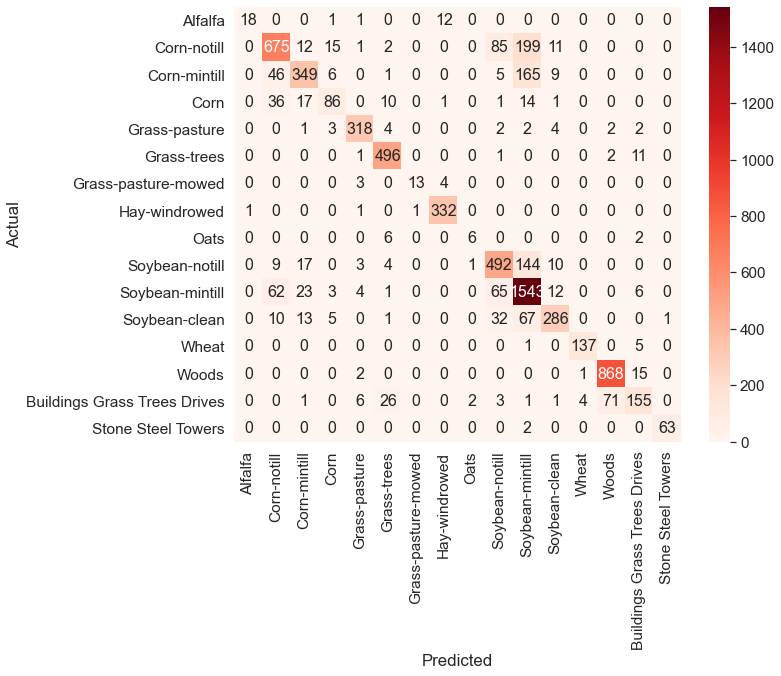

In [16]:
#PREDICTION OF ACCURACY AND VISUALIZATION

ypred = Classifier.predict(X_test)
print(type(ypred), ypred.shape)
names = ['Alfalfa','Corn-notill', 'Corn-mintill','Corn','Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat','Woods','Buildings Grass Trees Drives','Stone Steel Towers']

data = metrics.confusion_matrix(y_test, ypred)
print(data.shape)
df_cm = pd.DataFrame(data, columns=np.array(names), index = np.array(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

print(metrics.classification_report(y_test, ypred, target_names = names))

In [4]:
bands_EGCSR = np.zeros((4,32))

bands_EGCSR[0,:8] = np.array([132, 89, 91, 99, 85, 93, 71, 1])

bands_EGCSR[1,:16] = np.array([70, 138, 142, 81, 34, 89, 132, 120, 56, 178, 93, 2, 94, 101, 24, 85])

bands_EGCSR[2,:24] = np.array([45, 132, 17, 23, 101, 89, 98, 142, 72, 189, 120, 81, 56, 57, 174, 86, 82, 66, 94, 76, 155, 108, 138, 85])

bands_EGCSR[3,:32] = np.array([128, 140, 89, 195, 57, 14, 167, 56, 83, 29, 175, 25, 142, 81, 61, 122, 156, 120, 76, 187, 45, 101, 86, 21, 94, 138, 0, 78, 178, 108, 72, 84])

np.save("bands_EGCSR", bands_EGCSR)





In [6]:
    bands_EGCSR = np.load("bands_EGCSR.npy")
    
    bands_bombs = np.load("bands_bombs.npy")
    
    print(bands_EGCSR.shape, bands_bombs.shape)

(4, 32) (4, 32)


In [11]:
print(bands_bombs)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [nan nan nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.]]
